## OCR Report
This notebook constructs a proof-of-concept report of the district level data of Washington State schools, describing discipline and attendance information and highlighting disproportionate areas. See the README [here](https://github.com/CBofill/OCR-Discipline-and-Attendance-Visualization-Tool) for more information.

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns

In [23]:
input_file = './data/NeedDistrict_Part2.csv'
output_file = './calculated_data.csv'

race_abbreviations = ['HI','AM','AS','HP','BL','WH','TR']

In [3]:
# Import the data
data = pd.read_csv(input_file)

#### Enrollment
Enrollment is provided by race/ethnicity separated by gender. The total for each race/ethnicity is calculated, as well as the total students enrolled in each school.

In [11]:
enrollment_data = pd.DataFrame()

# Calculate enrollment totals at school level
for race in race_abbreviations:
    enrollment_data[race] = data[['SCH_ENR_'+race+'_M','SCH_ENR_'+race+'_F']].sum(axis=1)
enrollment_data['total'] = enrollment_data.sum(axis=1)

# Calculate enrollment percentages
for race in race_abbreviations:
    enrollment_data[race+'_p'] = enrollment_data[race] / enrollment_data['total']

#### In-School Suspensions
In-school suspension data are provided by race/ethnicity separated by gender and students with and without disabilites. The percentage rate of students who received one or more in-school suspension is summed by race/ethnicity, then the composition index is calculated.

In [12]:
# Calculate in-school suspension totals
iss_data = pd.DataFrame()
for race in race_abbreviations:
    iss_data[race] = data[['SCH_DISCWODIS_ISS_'+race+'_M','SCH_DISCWODIS_ISS_'+race+'_F',
                                       'SCH_DISCWDIS_ISS_IDEA_'+race+'_M','SCH_DISCWDIS_ISS_IDEA_'+race+'_F']].sum(axis=1)
iss_data['total'] = iss_data.sum(axis=1)

# Calculate in-school suspension percentages
for race in race_abbreviations:
    iss_data[race+'_p'] = iss_data[race]/iss_data['total']

# Calculate composition index
for race in race_abbreviations:
    iss_data[race+'_comp'] = iss_data[race+'_p'] / enrollment_data[race+'_p']

#### Out-of-School Suspensions
Out-of-school suspension data are provided by race/ethnicity separated by gender, students with and without disabilities, and students receiving only one or more than one suspension. The percentage rate of students who received one or more out-of-school suspension is summed by race/ethnicity, and the composition index is calculated.

In [13]:
# Calculate out-of-school suspension totals
ooss_data = pd.DataFrame()

for race in race_abbreviations:
    ooss_data[race] = data[['SCH_PSDISC_SINGOOS_'+race+'_M','SCH_PSDISC_SINGOOS_'+race+'_F',
                                        'SCH_PSDISC_MULTOOS_'+race+'_M','SCH_PSDISC_MULTOOS_'+race+'_F',
                                        'SCH_DISCWODIS_SINGOOS_'+race+'_M','SCH_DISCWODIS_SINGOOS_'+race+'_F',
                                        'SCH_DISCWODIS_MULTOOS_'+race+'_M','SCH_DISCWODIS_MULTOOS_'+race+'_F',
                                        'SCH_DISCWDIS_SINGOOS_IDEA_'+race+'_M','SCH_DISCWDIS_SINGOOS_IDEA_'+race+'_F',
                                        'SCH_DISCWDIS_MULTOOS_IDEA_'+race+'_M',
                                        'SCH_DISCWDIS_MULTOOS_IDEA_'+race+'_F']].sum(axis=1)
ooss_data['total'] = ooss_data.sum(axis=1)

# Calculate in-school suspension percentages
for race in race_abbreviations:
    ooss_data[race+'_p'] = ooss_data[race]/ooss_data['total']

# Calculate composition index
for race in race_abbreviations:
    ooss_data[race+'_comp'] = ooss_data[race+'_p']/enrollment_data[race+'_p']

#### Expulsions
Expulsions data are provided by race/ethnicity separated by gender, students with and without disabilities, and students who received an expulsion with or without educational services. The percentage rate of students who received an expulsion is summed by race/ethnicity, and the composition index is calculated.

In [14]:
# Calculate expulsion totals
expulsion_data = pd.DataFrame()

for race in race_abbreviations:
    expulsion_data[race] = data[['SCH_PSDISC_EXP_'+race+'_M','SCH_PSDISC_EXP_'+race+'_F',
                                            'SCH_DISCWODIS_EXPWE_'+race+'_M','SCH_DISCWODIS_EXPWE_'+race+'_F',
                                            'SCH_DISCWODIS_EXPWOE_'+race+'_M','SCH_DISCWODIS_EXPWOE_'+race+'_F',
                                            'SCH_DISCWDIS_EXPWE_IDEA_'+race+'_M','SCH_DISCWDIS_EXPWE_IDEA_'+race+'_F',
                                            'SCH_DISCWDIS_EXPWOE_IDEA_'+race+'_M',
                                             'SCH_DISCWDIS_EXPWOE_IDEA_'+race+'_F']].sum(axis=1)
expulsion_data['total'] = expulsion_data.sum(axis=1)
    
# Calculate expulsion percentages
for race in race_abbreviations:
    expulsion_data[race+'_p'] = expulsion_data[race]/expulsion_data['total']
    
# Calculate composition index
for race in race_abbreviations:
    expulsion_data[race+'_comp'] = expulsion_data[race+'_p']/enrollment_data[race+'_p']

### Export Data for Visualization
The aggregated and calculated data is exported to make it easier to construct a visualization without this notebook.

In [27]:
# Combine calculated data
enrollment = enrollment_data.add_prefix('enrollment_')
iss = iss_data.add_prefix('iss_')
ooss = ooss_data.add_prefix('ooss_')
expulsion = expulsion_data.add_prefix('expulsion_')
calculated_data = pd.concat([enrollment,iss,ooss,expulsion], axis=1)

# Export to .csv
calculated_data.to_csv(output_file, na_rep=0)

### Data Visualization
Under development

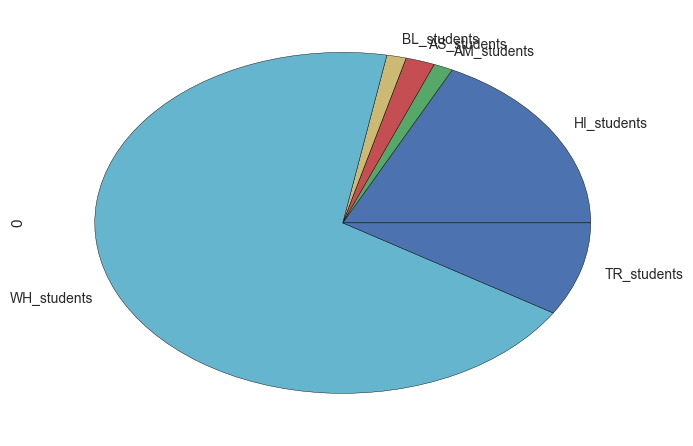

In [8]:
students = [race + '_students' for race in race_abbreviations]
enrollment_data.iloc[0][students].plot.pie();

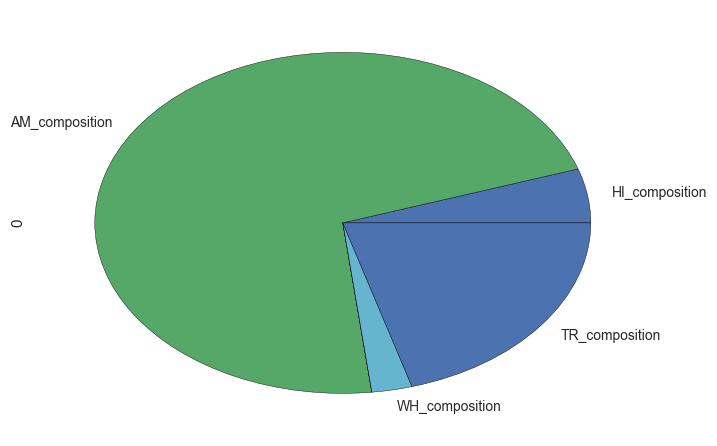

In [9]:
compositions = [race + '_composition' for race in race_abbreviations]
ooss_data.iloc[0][compositions].plot.pie();